![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [6]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

#### Análisis: 
Evidenciamos que la mayoría de los tweets tienen un sentimiento negativo. Particularmente, el 62.7% del total tienen este sentimiento. Los tweets neutrales representan, por su parte, el 21,2% del total y el 16,1% restante los tweets positivos. 

In [7]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

#### Análisis:
Encontramos que en la mayoría de las aerolíneas predomina el sentimiento negativo, a excepción de Virgin America, en donde dicha distribución es más equitativa pese a que es la aerolínea con la que se cuenta menos tweets (3.4% del total).

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

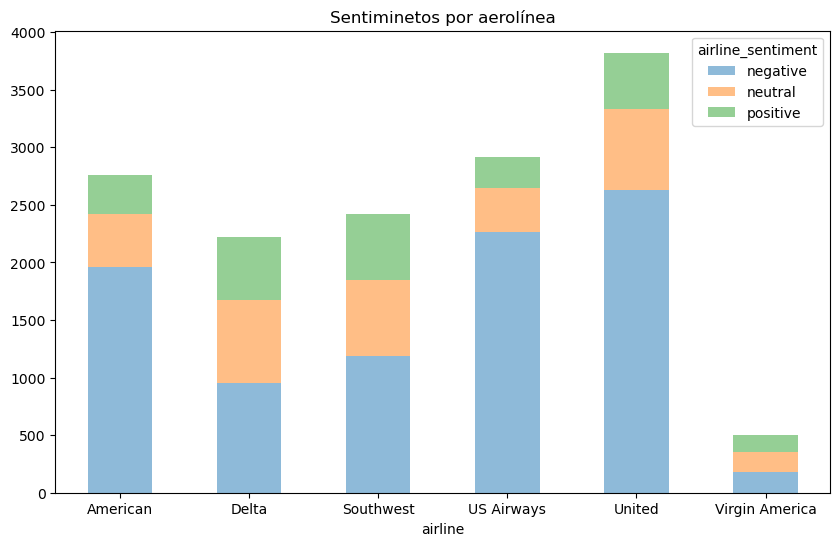

In [8]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [10]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Se hace una transformación con la función CountVectorizer usando sus parámetros por defecto. Se aplica la misma transformación a los datos completos y a las particiones de train y test.

In [12]:
# Celda 1
vect_A = CountVectorizer()
X_dtm_A = vect_A.fit_transform(X_train)
X_dtm_A_test = vect_A.transform(X_test)
X_dtm_A_total = vect_A.transform(X)

In [14]:
#Definición random forest e impresión de desempeño del modelo usando la función cross_val_score 
clfA = RandomForestClassifier()
clfA
pd.Series(cross_val_score(clfA,X_dtm_A_total, y, cv=5)).describe()

count    5.000000
mean     0.731216
std      0.022095
min      0.694331
25%      0.730874
50%      0.737363
75%      0.740779
max      0.752732
dtype: float64

In [15]:
clfA.fit(X_dtm_A, y_train)
accuracyA = clfA.score(X_dtm_A_test,y_test)
accuracyA

0.7680049668874173

Se ejecuta un cross validation con los datos completos para ver el comportamiento general del modelo y se calcula el accuracy promedio con los datos de test obteniendo un valor de 0.768

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Se hace una transformación con la función CountVectorizer, definiendo el valor para el parámetro "stopwords". Se aplica la misma transformación a los datos completos y a las particiones de train y test.

In [20]:
# Celda 2
vect_B = CountVectorizer(stop_words='english')

X_dtm_B = vect_B.fit_transform(X_train)
X_dtm_B_test = vect_B.transform(X_test)
X_dtm_B_total = vect_B.transform(X)

In [21]:
#Definición random forest e impresión de desempeño del modelo usando la función cross_val_score 
clfB = RandomForestClassifier()
clfB
pd.Series(cross_val_score(clfB, X_dtm_B_total, y, cv=5)).describe()

count    5.000000
mean     0.699795
std      0.049183
min      0.631148
25%      0.665301
50%      0.721995
75%      0.738730
max      0.741803
dtype: float64

In [23]:
clfB.fit(X_dtm_B, y_train)
accuracyB = clfB.score(X_dtm_B_test,y_test)
accuracyB

0.7640728476821192

Se ejecuta un cross validation con los datos completos para ver el comportamiento general del modelo y se calcula el accuracy promedio con los datos de test obteniendo un valor de 0.764

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [24]:
# Celda 3
# Importación de librerias
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Mayra
[nltk_data]     N\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
#Se obtienen las palabras de la transformación con countVectorizer por defecto
words = list(vect_A.vocabulary_.keys())[:100]

In [26]:
# Obtención e impresión de los lemas de cada palabra de la lista asumiendo que cada palabra es un verbo
print([wordnet_lemmatizer.lemmatize(word,pos='v') for word in words])

['jetblue', 'of', 'course', 'be', 'americanair', 'complt', 'incompetence', 'on', 'flt', '295', 'lav', 'delay', 'from', 'pln', 'that', 'lnded', 'last', 'nite', 'no', 'internet', 'and', 'poor', 'svc', 'not', 'what', 'expect', 'southwestair', 'flight', '4968', 'n8325d', 'depart', 'mco', 'enroute', 'to', 'no_airport', 'http', 'co', 'fd4snvkiem', 'usairways', 'do', 'anyone', 'your', 'airline', 'know', 'how', 'do', 'their', 'job', 'unite', 'want', 'plane', 'dad', 'my', '386', 'dallas', 'jacksonville', 'fl', 'have', 'be', 'cancel', 'flightled', 'one', 'notify', 'me', 'go', 'it', 'be', 'try', 'make', 'but', 'probably', 'too', 'late', 'do', 'see', 'an', 'email', 'could', 'call', 'pittsburgh', 'international', 'always', 'look', 'forward', 'jb', 'rt', 'bostongarden', 'look', 'welcome', 'you', 'onboard', 'have', 'the', 'ability', 'switch', 'cannot', 'tell', 'where', 'bag', 'be']


In [27]:
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]

Se hace una transformación con la función CountVectorizer, aplicando la lematización de verbos. Se hace la misma transformación a los datos completos y a las particiones de train y test.

In [30]:
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)
X_dtm_C = vect_lemas.fit_transform(X_train)
X_dtm_C_test = vect_lemas.transform(X_test)
X_dtm_C_total = vect_lemas.transform(X)

In [31]:
#Definición random forest e impresión de desempeño del modelo usando la función cross_val_score 
clfC = RandomForestClassifier()
clfC
pd.Series(cross_val_score(clfC, X_dtm_C_total, y, cv=5)).describe()

count    5.000000
mean     0.712637
std      0.023623
min      0.671107
25%      0.717213
50%      0.722336
75%      0.723019
max      0.729508
dtype: float64

In [32]:
clfC.fit(X_dtm_C, y_train)
accuracyC = clfC.score(X_dtm_C_test,y_test)
accuracyC

0.7624172185430463

Se ejecuta un cross validation con los datos completos para ver el comportamiento general del modelo y se calcula el accuracy promedio con los datos de test obteniendo un valor de 0.7624

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Se hace una transformación con la función CountVectorizer, aplicando la lematización y las stopwords. Se hace la misma transformación a los datos completos y a las particiones de train y test.

In [33]:
# Celda 4
vect_todo = CountVectorizer(analyzer=split_into_lemmas, stop_words='english')
X_dtm_todo = vect_todo.fit_transform(X_train)
X_dtm_todo_test = vect_todo.transform(X_test)
X_dtm_todo_total = vect_todo.transform(X)

In [34]:
#Definición random forest e impresión de desempeño del modelo usando la función cross_val_score 
clfTodo = RandomForestClassifier()
clfTodo
pd.Series(cross_val_score(clfTodo,X_dtm_todo_total, y, cv=5)).describe()

count    5.000000
mean     0.707992
std      0.017238
min      0.681011
25%      0.702869
50%      0.714139
75%      0.715505
max      0.726434
dtype: float64

In [35]:
clfTodo.fit(X_dtm_todo, y_train)
accuracyTodo = clfTodo.score(X_dtm_todo_test,y_test)
accuracyTodo

0.7591059602649006

Se ejecuta un cross validation con los datos completos para ver el comportamiento general del modelo y se calcula el accuracy promedio con los datos de test obteniendo un valor de 0.7591

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

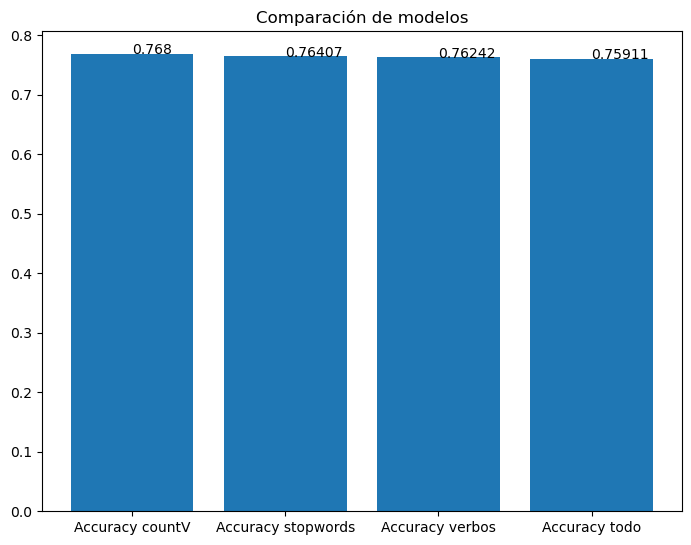

In [41]:
# Celda 5
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = [ 'Accuracy countV', 'Accuracy stopwords', 'Accuracy verbos', 'Accuracy todo']
ejeY = [ round(accuracyA,5), round(accuracyB,5), round(accuracyC,5), round(accuracyTodo,5)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

#### Análisis:
Observando los resultados se encuentran valores similares entre las distintas modificaciones y el modelo default del countVectorizer, con un accuracy que gravita alrededor del 0.76. Se podría afirmar que las transformaciones estan afectando el contexto y sentido de los tweets, lo que genera que el accuracy medio vaya disminuyendo levemente a medida que se incluyen factores que normalizan los textos. 